#### Software package name
pyBlockSeis - Block Choice Seismic Analysis in Python

1. Input data: time series, delta
2. Input parameters
3. Functions
  - compute continuous wavelet transform (CWT)
  - apply a block bandpass
  - calculate noise model and threshold function
  - apply SNR detection method
  - apply hard thresholding to the noise (noise removal)
  - apply soft thresholding to the noise (noise removal)
  - apply hard thresholding to the signal (signal removal)
  - apply soft thresholding to the signal (signal removal)
  - compute the inverse CWT
4. Example of computation in parallel https://deepgraph.readthedocs.io/en/latest/tutorials/pairwise_correlations.html

5. Defaults in source code:
        wave_type = "morlet",
        nvoices = 16,
        bandpass_blocking = True,
        scale_min = 1.0,
        scale_max = 200.0,
        block_threshold = 0.0,
        estimate_noise = True, # params after require estimate_noise = True
        noise_starttime = 0.0,
        noise_endtime = 60.0,
        noise_threshold = None,
        signal_threshold = None,
        nsigma_method = "ECDF", # method to compute nsigma
        snr_detection = False,
        snr_lowerbound = 1.0,

### Acknowledgements
- Python adapation of the Matlab software Block Choice Seismic Analysis (BCseis, version 1.1) by Charles A. Langston and S. Mostafa Mousavi.
- Forward and inverse CWTs functions based on the Synchrosqueezing Toolbox V1.21 by Eugene Brevdo and Gaurav Thakur.  (https://github.com/ebrevdo/synchrosqueezing).

In [14]:
import sys
sys.path.append("src")

import pyblockseis as bcs
from obspy.core import read
#from obspy import write
import matplotlib.pyplot as plt 

import timeit

Run took -0.0060 seconds


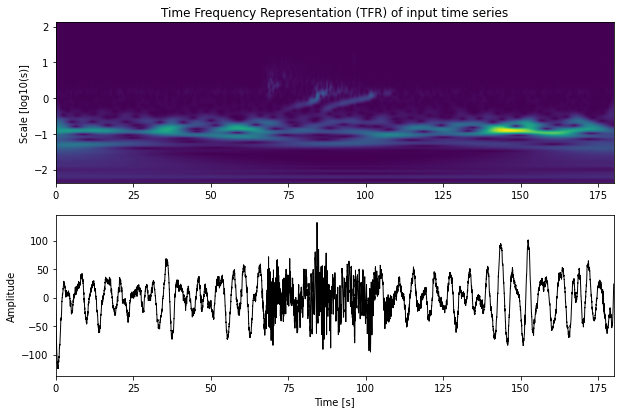

In [15]:
# Read example data from BCseis
sacfile = "/Users/aguiarmoya1/Research/Denoising/bc_v1.1/data/5014.YW.0.sp0011.DPZ"
#sacfile = "/Users/chiang4/Work/NNSA/LYNM/denoiser/bc_v1.1/data/*DPZ" # multiple traces
st = read(sacfile)

start = timeit.timeit()
# Use the default values to process time series
# Refer to :class:pyblockseis.Parameter docstring for details
params = bcs.Parameter(block_threshold=1.0, noise_threshold="soft", signal_threshold="soft", 
                       bandpass_blocking = False)

# Initalize the block processing module
block = bcs.Block(choice=params, data=st)

# Run the denoiser
block.run()
end = timeit.timeit()
print("Run took %.4f seconds"%(end - start))

# Plot results
block.plot("input")
#block.plot("band_rejected")
#block.plot("noise_removed")
#block.plot("signal_removed")

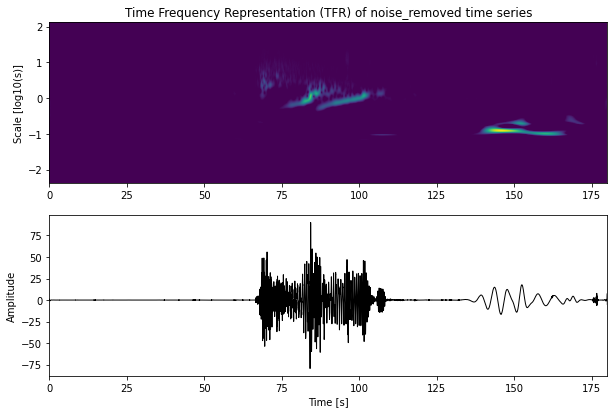

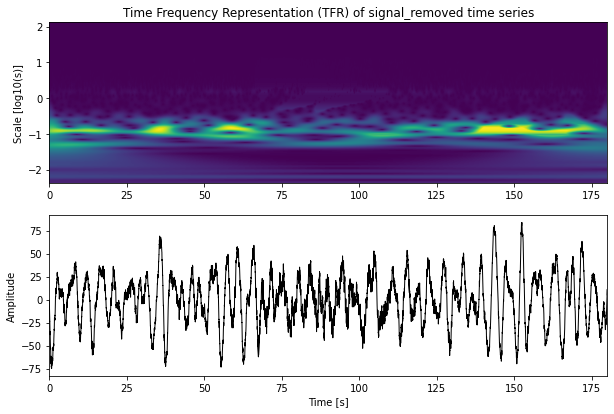

In [16]:
block.plot("noise_removed")
block.plot("signal_removed")

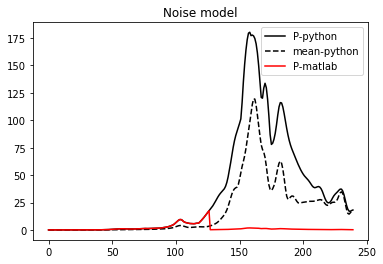

In [17]:
import numpy as np
plt.figure()
plt.title("Noise model")
plt.plot(block.data[0].wavelet.P,"k",label="P-python")
plt.plot(block.data[0].wavelet.M,"k--",label="mean-python")
matP = np.loadtxt("tmp/P.txt")
plt.plot(matP,"r",label="P-matlab")
plt.legend()

In [20]:
tr = block.data[0].copy() # make a hard copy of the trace so you don’t modify existing data
print(tr.wavelet.icwt) # list available processed waveforms
tr.data = tr.wavelet.icwt["noise_removed"] # copy desired array to data field
tr.write("noise_removed.sac",format="SAC") # write waveform to SAC

{'input': array([ -0.02533707,  -0.85960367,  -1.76401459, ...,  14.87378463,
        15.08241479,   0.08136806]), 'band_rejected': None, 'noise_removed': array([ 0.62324211,  1.01417631,  1.05075359, ...,  5.32092318,
        7.60395374, -5.03609203]), 'signal_removed': array([-0.64857918, -1.87377999, -2.81476818, ...,  9.55286145,
        7.47846105,  5.11746009])}
